In [139]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.externals import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'insurance.csv',
 'Machine Learning.ipynb',
 'PLeaseDeleteMe.txt']

In [118]:
data = pd.read_csv("insurance.csv", usecols=["age", "sex", "bmi", "children", "smoker", "charges"])
data['smoker'] = data['smoker'].replace(to_replace = "yes", value = 1)
data['smoker'] = data['smoker'].replace(to_replace = "no", value = 0)
data['sex'] = data['sex'].replace("male", value = 1)
data['sex'] = data['sex'].replace("female", value = 0)
data = data.join(pd.get_dummies(data['sex']))
data.columns = ["age","sex", "bmi", "children", "smoker", "charges", "female", "male"]
data = data.join(pd.get_dummies(data['smoker']))
data.columns = ["age","sex", "bmi", "children", "smoker", "charges", "female", "male", "smoke_no", "smoke_yes"]
data = data.drop(["sex", "smoker"], axis = 1)
data["charges_q"] = pd.qcut(data["charges"], 5, labels=False)+1
print(data.head())


   age     bmi  children      charges  female  male  smoke_no  smoke_yes  \
0   19  27.900         0  16884.92400       1     0         0          1   
1   18  33.770         1   1725.55230       0     1         1          0   
2   28  33.000         3   4449.46200       0     1         1          0   
3   33  22.705         0  21984.47061       0     1         1          0   
4   32  28.880         0   3866.85520       0     1         1          0   

   charges_q  
0          4  
1          1  
2          2  
3          5  
4          1  


0.730966001977


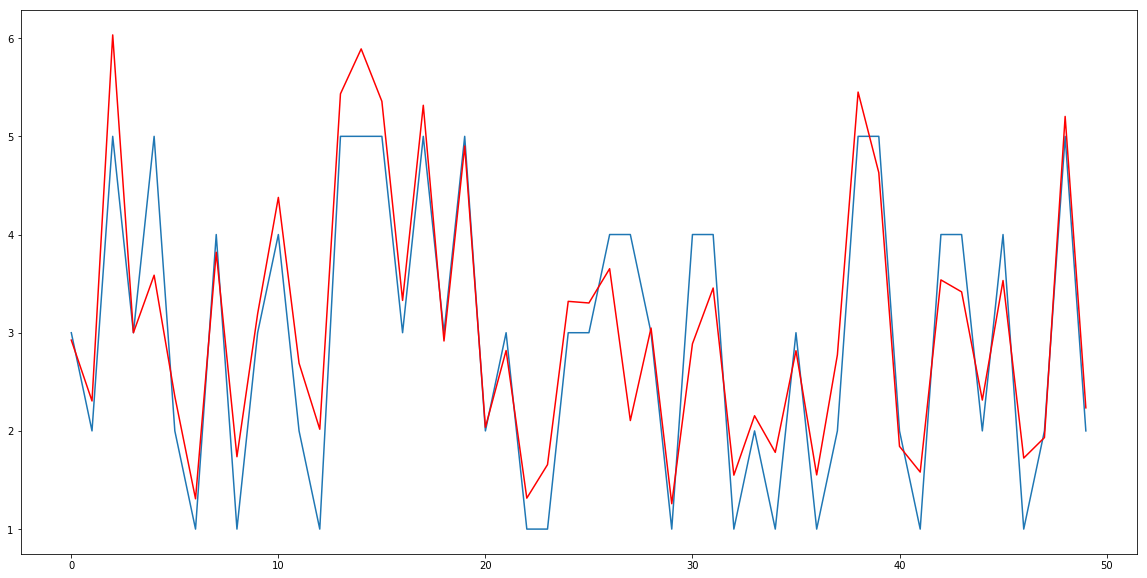

In [140]:
X = data.drop(["charges", "charges_q"], axis=1)
y = data["charges_q"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
# reg = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
reg = Ridge()
reg.fit(X_train, y_train)
joblib.dump(reg, 'ridge.pkl')
y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))
y_test = y_test.reset_index().drop(["index"], axis=1)
y_pred = pd.DataFrame(y_pred)
plt.figure(figsize=(20,10))
plt.plot(y_test.iloc[:50,])
plt.plot(y_pred.iloc[:50,], color="red")
plt.show()

In [134]:
to_pred = pd.DataFrame.from_dict([{"age": 19, "bmi": 27.9, "children": 2, "female": 1, 
                        "male": 0, "smoke_no": 0, "smoke_yes": 1}], orient='columns')
reg.predict(to_pred)

array([ 3.80814175])